Цель исследования: поиск аномалий в банковских транзакциях.

# EDA и Preprocessing

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
import umap
from sklearn.ensemble import IsolationForest

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('C:\\Users\\algol\\Downloads\\creditcard.csv')


## Изучим данные

In [ ]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()

    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма,
#а также явных дубликатов
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    count_duplicates = df.duplicated().sum()

    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing,
                                     'num_duplicates': count_duplicates})

    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', df_data.shape[0])
    print('Количество столбцов файла:', df_data.shape[1])
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках и явных дубликатах данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

In [ ]:
df_info(df)

Количество строк файла: 284807
Количество столбцов файла: 31

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
Class,"[0, 1]",int64,2
V28,"[-0.0210530534538215, 0.0147241691924927, -0.0...",float64,275663
V27,"[0.133558376740387, -0.0089830991432281, -0.05...",float64,275663
V26,"[-0.189114843888824, 0.125894532368176, -0.139...",float64,275663
V25,"[0.128539358273528, 0.167170404418143, -0.3276...",float64,275663
V24,"[0.0669280749146731, -0.339846475529127, -0.68...",float64,275663
V23,"[-0.110473910188767, 0.101288021253234, 0.9094...",float64,275663
V22,"[0.277837575558899, -0.638671952771851, 0.7716...",float64,275663
V21,"[-0.018306777944153, -0.225775248033138, 0.247...",float64,275663
V20,"[0.251412098239705, -0.0690831352230203, 0.524...",float64,275663



Информация о пропусках и явных дубликатах данных:


,column_name,num_missing,percent_missing,num_duplicates
Time,Time,0,0.0,1081
V1,V1,0,0.0,1081
V2,V2,0,0.0,1081
V3,V3,0,0.0,1081
V4,V4,0,0.0,1081
V5,V5,0,0.0,1081
V6,V6,0,0.0,1081
V7,V7,0,0.0,1081
V8,V8,0,0.0,1081
V9,V9,0,0.0,1081



Первые пять строк таблицы:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Пропусков нет. Все данные числовые, категориальных переменных нет. Дубликаты это повторение числовых значений, что нормально.

Данные включают в себя время, количество, класс и первые 28 главных компонент, полученных после PCA преобразования оригинальных данных. Все 28 компонент  анонимизированные переменные про которые мы ничего не знаем.

Взято с kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

## Исследовательский анализ данных

### Гистограммы

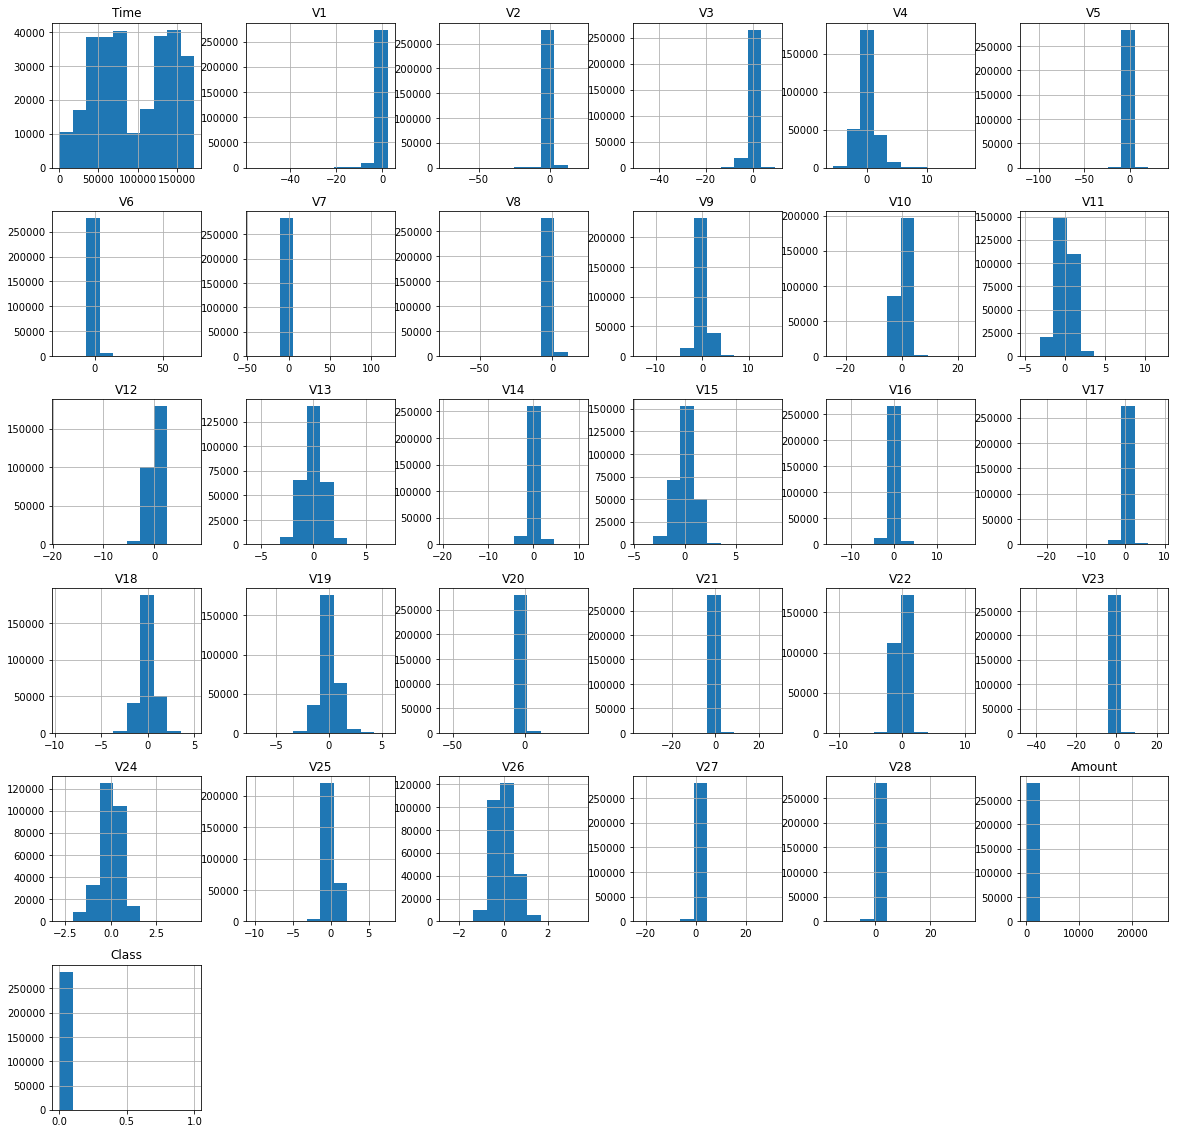

In [ ]:
df.hist(figsize=(20, 20));

Время похоже на биномиальное распределение. Остальные распределения не похожи на нормальные. Данные размасштабированы.

### Корреляции

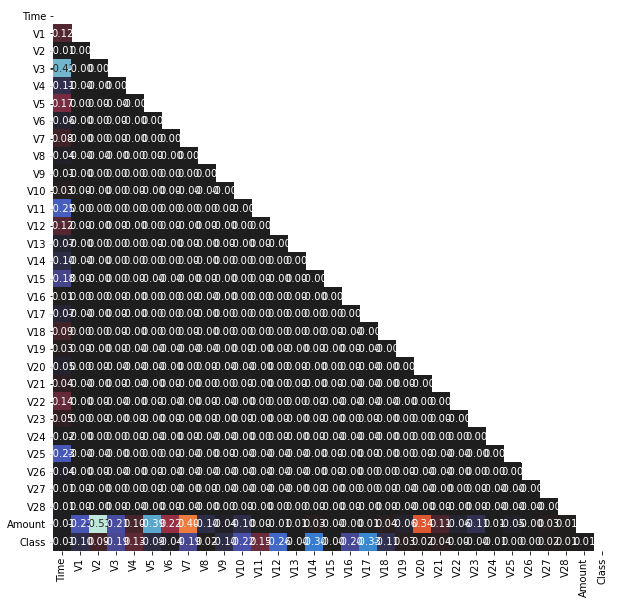

In [ ]:
plt.figure(figsize=(10,10))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

Скоррелированные данные отсутствуют.

### Построим попарные распределения для некоторых признаков.

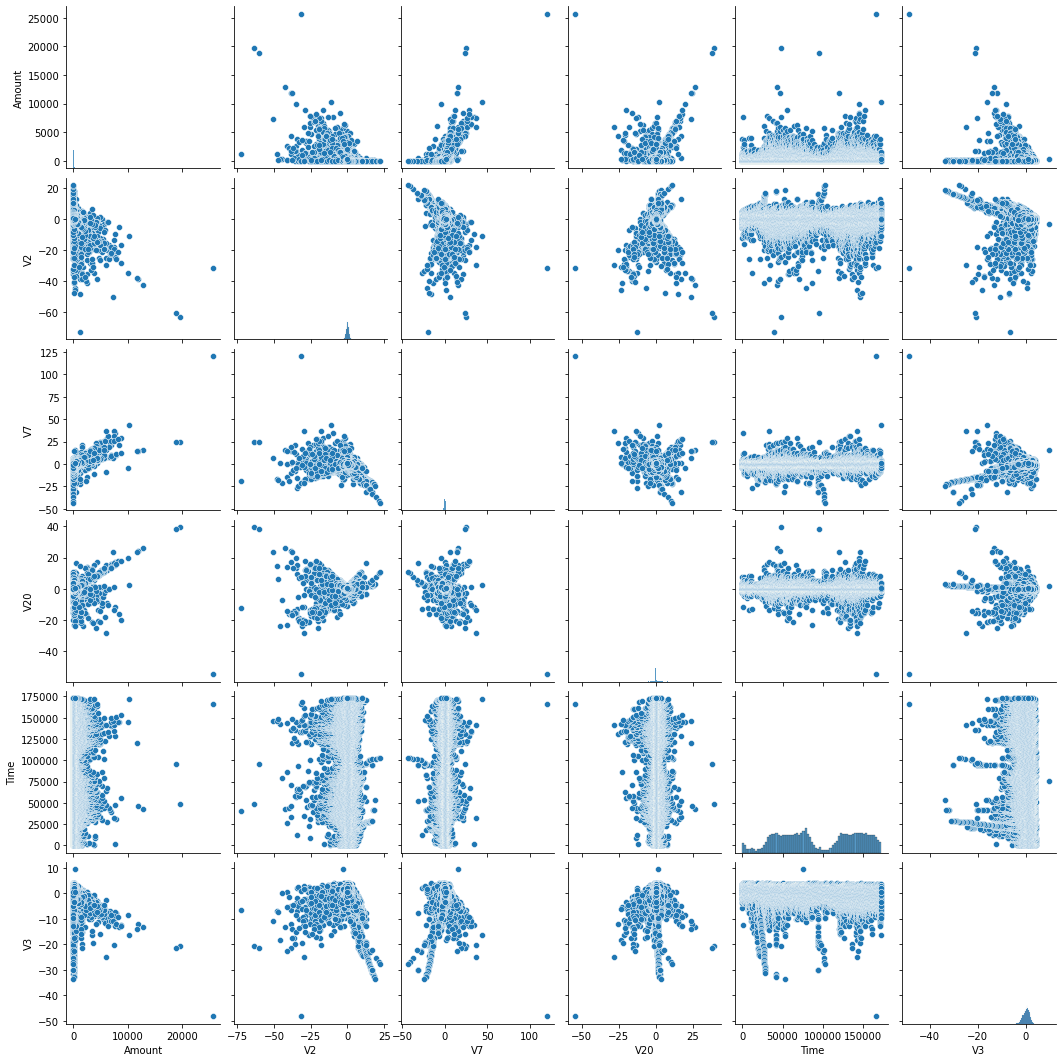

In [ ]:
sns.pairplot(df[['Amount', 'V2', 'V7', 'V20', 'Time', 'V3']]);

Что-то похожее на зависимости просматривается между Amount и V2, V20.

## Посчитаем процент аномалий по переменной Class.

Т.к. транзакций с меткой 1 очень мало, то предполагаем, что это аномалии. Посчитаем сколько %данных от общего количества имеют метку 1.

In [ ]:
cl_1 = df.query('Class == 1')
fraud_percent = len(cl_1)/len(df)*100
round(fraud_percent, 2)

0.17

Количество аномалий составляет 0,17%.

# Найдем процент аномалий различными методами.

In [ ]:
#удалим колонку Class
df_nc = df.drop(columns = 'Class', axis = 1)

## Метод 3х сигм

Создадим функцию для подсчета аномалий находящихся за порогом 3 сигмы

In [ ]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

Создадим функцию для подсчета процента отклонений и вывода на экран.

In [ ]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns

    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True

    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)

    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))

In [ ]:
comparison_table, std_outliers = get_column_outliers(df_nc)
anomalies_report(std_outliers)

Total number of outliers: 37816
Percentage of outliers:   13.28%


Настроим модель для уменьшения процента отклонений, для этого увеличим количество сигм.

In [ ]:
comparison_table, std_outliers = get_column_outliers(df_nc, threshold=4)
anomalies_report(std_outliers)

Total number of outliers: 14495
Percentage of outliers:   5.09%


In [ ]:
comparison_table, std_outliers = get_column_outliers(df_nc, threshold=18)
anomalies_report(std_outliers)

Total number of outliers: 498
Percentage of outliers:   0.17%


Методом перебора я нашел, что 18 сигм дают тот же процент аномалий, что и метка 1 для переменной Сlass.

In [ ]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V23,11.240285,-11.240285,114.0,0.040027
V21,13.221432,-13.221432,92.0,0.032303
V28,5.941499,-5.941499,88.0,0.030898
V20,13.876650,-13.876650,85.0,0.029845
V8,21.498352,-21.498352,77.0,0.027036
Amount,4590.511586,-4413.812347,74.0,0.025983
V17,15.288067,-15.288067,73.0,0.025631
V7,22.267685,-22.267685,45.0,0.015800
V2,29.723554,-29.723554,45.0,0.015800
V27,7.265385,-7.265385,33.0,0.011587


Визуализируем аномалии для некоторых признаков.

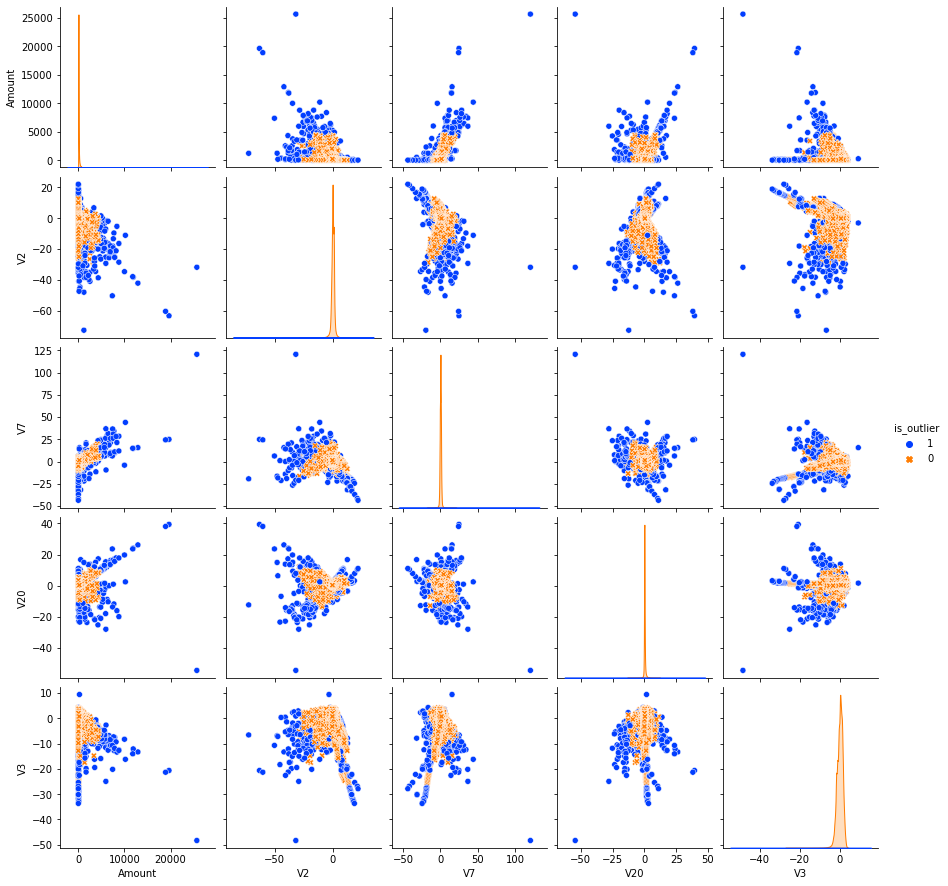

In [ ]:
labeled_data = df_nc[['Amount', 'V2', 'V7', 'V20', 'V3']].copy()
labeled_data['is_outlier'] = std_outliers

sns.pairplot(data=labeled_data, vars = ['Amount', 'V2', 'V7', 'V20', 'V3'],
            hue='is_outlier', hue_order=[1, 0],
            markers=['X', 'o'],  palette='bright');

## Метод межкавартильного размаха с помощью Boxplot

Построим боксплоты для всех признаков.

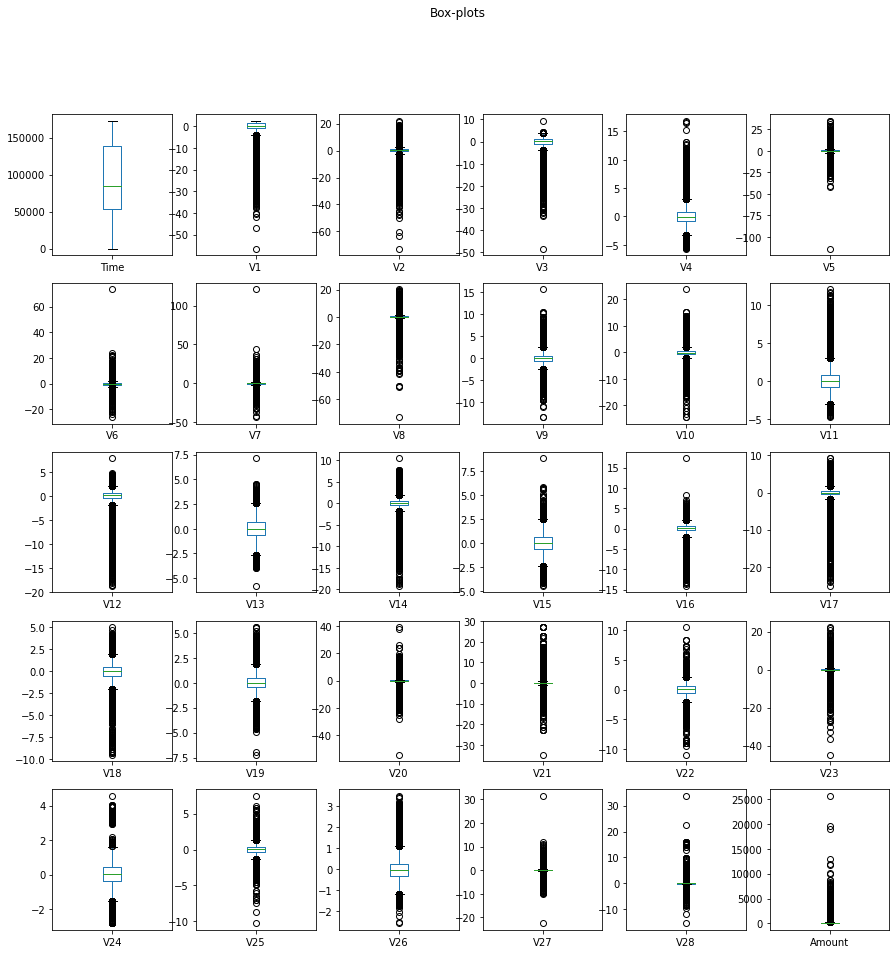

In [ ]:
fig, axes = plt.subplots(5, 6, figsize=(15, 15))
fig.suptitle('Box-plots')

row=0
col=0

for ax, feature in enumerate(df_nc):
    df_nc[feature].plot.box(ax=axes[row, col])
    col+=1
    if col > 5:
        row+=1
        col=0

Создадим функцию которая находит аномалии для межкавартильного размаха.

In [ ]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

Подсчитаем процент отклонений.

In [ ]:
comparison_table, iqr_outliers = get_column_outliers(df_nc, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 53336
Percentage of outliers:   18.73%


Настроим модель для уменьшения процента отклонений, для этого увеличим коффициент на который умножается межквартильный размах.

In [ ]:
comparison_table, iqr_outliers = get_column_outliers(df_nc, function=outlier_iqr, threshold=5)
anomalies_report(iqr_outliers)

Total number of outliers: 26803
Percentage of outliers:   9.41%


In [ ]:
comparison_table, iqr_outliers = get_column_outliers(df_nc, function=outlier_iqr, threshold=43)
anomalies_report(iqr_outliers)

Total number of outliers: 480
Percentage of outliers:   0.17%


Методом перебора я нашел, что коэффицииент равный 43 дает тот же процент аномалий, что и метка 1 для переменной Сlass.

In [ ]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Amount,3.154460e+03,-3.071695e+03,253.0,0.088832
V28,5.721589e+00,-5.696269e+00,95.0,0.033356
V20,1.495782e+01,-1.503650e+01,72.0,0.025280
V23,1.345564e+01,-1.346985e+01,70.0,0.024578
V8,2.337430e+01,-2.325558e+01,50.0,0.017556
V27,7.052085e+00,-7.031879e+00,42.0,0.014747
V21,1.802158e+01,-1.806360e+01,32.0,0.011236
V2,6.110150e+01,-6.089632e+01,2.0,0.000702
V5,5.666344e+01,-5.674311e+01,1.0,0.000351
V6,5.057357e+01,-5.094330e+01,1.0,0.000351


## Кластеризация

 <center> Distance-based</center>

### Distance-based на основе метрики "euclidean" (L2-регрессия)

Создадим функции позволяющие провести кластеризацию на основе метода Distance-based.

In [ ]:
class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:

    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)

    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

Проведем масштабирование, т.к. будем пользоваться методом измеряющим расстояния.

In [ ]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(df_nc),
    columns=df_nc.columns
)

In [ ]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=95)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 14241
Percentage of outliers:   5.00%


Настроим модель для уменьшения процента отклонений, для этого увеличим персентиль.

In [ ]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=99)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 2849
Percentage of outliers:   1.00%


In [ ]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=99.83)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


Методом перебора я нашел, что персентиль 99.83 дает тот же процент аномалий, что и метка 1 для переменной Сlass.

### Distance-based на основе метрики "cityblock" (L1-регрессия)

In [ ]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=95)
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

labeled_data = df_nc.copy()
labeled_data['is_outlier'] = cityblock_outliers

Total number of outliers: 14241
Percentage of outliers:   5.00%


In [ ]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=99.83)
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

labeled_data = df_nc.copy()
labeled_data['is_outlier'] = cityblock_outliers

Total number of outliers: 485
Percentage of outliers:   0.17%


Методом перебора я нашел, что персентиль 99.83 дает тот же процент аномалий, что и метка 1 для переменной Сlass.

In [ ]:
labeled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_outlier
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Density-based (DBScan)

Найдем с помощью PCA количество компонент, объясняющих 90% дисперсии.

In [ ]:
from sklearn.decomposition import PCA

#найдем направления осей с максимальной дисперсией
pca = PCA()
pca.fit(scaled_data)
# найдем дисперсии кумулятивным итогом и вычислим размерность дающую объяснение 90% дисперсии
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

19

Снизим размерность с помощью UMAP

In [ ]:
reducer = umap.UMAP(n_components = 19, random_state=42)
embedding = reducer.fit_transform(scaled_data)
embedding.shape


(284807, 19)

Укажем сразу требуемый процент аномалий 0,17% как параметр outlier_percentage.

In [ ]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать. Здесь указываем
#процент аномалий до какого считать.

eps = 1.0
eps_history = [eps]

while outlier_percentage>0.0017:
    model = DBSCAN(eps=eps).fit(embedding)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.5
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

model = DBSCAN(eps)
model.fit(embedding)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [ ]:
eps

1.5

In [ ]:
anomalies_report(density_outlier)

Total number of outliers: 0
Percentage of outliers:   0.00%


### One class SVM

In [ ]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.0017, gamma='auto')
one_class_svm.fit(embedding)
svm_outliers = one_class_svm.predict(embedding)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [ ]:
anomalies_report(svm_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.0017,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(embedding)

isolation_outliers = isolation_forest.predict(embedding)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [ ]:
anomalies_report(isolation_outliers)

Total number of outliers: 475
Percentage of outliers:   0.17%


# Оценим предсказания моделей

## Для метода 3х сигм

In [ ]:
# Начальные значения
y_true = df['Class']
# Предсказанные значения
y_pred = std_outliers.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[283906    409]
 [   403     89]]
              precision    recall  f1-score   support

           0      0.999     0.999     0.999    284315
           1      0.179     0.181     0.180       492

    accuracy                          0.997    284807
   macro avg      0.589     0.590     0.589    284807
weighted avg      0.997     0.997     0.997    284807



Матрица показывает высокие показатели верно предсказанных значений. Для аномалий метрики precision recall  f1-score низкие.

## Для межквартильного расстояния

In [ ]:
# Предсказанные значения
y_pred = iqr_outliers.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[283850    465]
 [   477     15]]
              precision    recall  f1-score   support

           0      0.998     0.998     0.998    284315
           1      0.031     0.030     0.031       492

    accuracy                          0.997    284807
   macro avg      0.515     0.514     0.515    284807
weighted avg      0.997     0.997     0.997    284807



 Для аномалий метрики precision recall f1-score низкие.

## Для L1 регрессии

In [ ]:
# Предсказанные значения
y_pred = euclidian_outliers.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[283848    467]
 [   474     18]]
              precision    recall  f1-score   support

           0      0.998     0.998     0.998    284315
           1      0.037     0.037     0.037       492

    accuracy                          0.997    284807
   macro avg      0.518     0.517     0.518    284807
weighted avg      0.997     0.997     0.997    284807



 Для аномалий метрики precision recall f1-score низкие.

## Для L2 регрессии

In [ ]:
# Предсказанные значения
y_pred = cityblock_outliers.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[283942    373]
 [   380    112]]
              precision    recall  f1-score   support

           0      0.999     0.999     0.999    284315
           1      0.231     0.228     0.229       492

    accuracy                          0.997    284807
   macro avg      0.615     0.613     0.614    284807
weighted avg      0.997     0.997     0.997    284807



 Для аномалий метрики precision recall f1-score низкие.

## Для DBScan

In [ ]:
# Предсказанные значения
y_pred = density_outlier.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[284315      0]
 [   492      0]]
              precision    recall  f1-score   support

           0      0.998     1.000     0.999    284315
           1      0.000     0.000     0.000       492

    accuracy                          0.998    284807
   macro avg      0.499     0.500     0.500    284807
weighted avg      0.997     0.998     0.997    284807



## Для One class SVM

In [ ]:
# Предсказанные значения
y_pred = svm_outliers.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[283840    475]
 [   482     10]]
              precision    recall  f1-score   support

           0      0.998     0.998     0.998    284315
           1      0.021     0.020     0.020       492

    accuracy                          0.997    284807
   macro avg      0.509     0.509     0.509    284807
weighted avg      0.997     0.997     0.997    284807



 Для аномалий метрики precision recall f1-score низкие.

## Для Isolatiom Forest

In [ ]:
# Предсказанные значения
y_pred = isolation_outliers.astype('int')

# напечатаем матрицу
print(metrics.confusion_matrix(y_true, y_pred))

# напечатаем precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[283842    473]
 [   490      2]]
              precision    recall  f1-score   support

           0      0.998     0.998     0.998    284315
           1      0.004     0.004     0.004       492

    accuracy                          0.997    284807
   macro avg      0.501     0.501     0.501    284807
weighted avg      0.997     0.997     0.997    284807



In [ ]:
df_fin = scaled_data.join(df['Class'])
df_fin.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [ ]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_fin)
embedding.shape

(284807, 2)

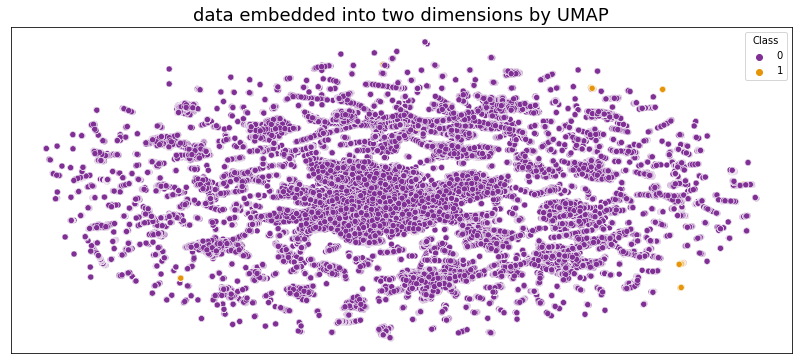

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_fin['Class'],
    palette="CMRmap",
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("data embedded into two dimensions by UMAP", fontsize=18)

plt.show()